# Problem Set 2

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import copy

# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

%load_ext autoreload
%autoreload 2

## Problem 1

#### (a)  Set up equations for the value of both the fixed- and floating legs in terms of the LIBOR fixings and zero coupon bond prices for the three interest rate swaps

In [2]:
# setting up the data

# dimensions
N, M = 8, 9
K = 100

# timing array in years from january 15th, and then every quarter (starts 1/24 into the year hence odd timing)
T = np.array([0, 5/24, 11/24, 17/24, 23/24, 29/24, 35/24, 41/24, 47/24])

# rates
L_3M, L6M = 0.052, 0.049
R_1, R_2, R_3 = 0.051, 0.044, 0.049

# price matrix
pi = np.array([
    0.79492002,   # Price of Swap 1
    -1.02540877,  # Price of Swap 2
    2.05066409,   # Price of Swap 3
    103.02163487, # Price of Bond 4
    101.80152680, # Price of Bond 5
    104.48120266, # Price of Bond 6
    101.10990798, # Price of Bond 7
    103.67216735  # Price of Bond 8
])

#### (b) Construct a cashflow matrix C with each row corresponding to a traded assets. What is the rank of this matrix? For which maturities can you compute zcb prices?

In [3]:
# cash flow matrix
C = np.zeros((N, M))

C[0,:] = [0, -K*(0.25*L_3M+1),0.5*K*R_1,0,0.5*K*R_1+K,0,0,0,0] # swap 1
C[1,:] = [0,0,K*(0.5*L6M+1),0,-K*R_2,0,0,0,-K*R_2-K] # swap 2
C[2,:] = [0, -K*(0.25*L_3M+1),0,0,K*R_3,0,0,0,K*R_3+K] # swap 3
C[3,:] = [0,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07+K,0,0,0,0] # bond 4
C[4,:] = [0,0,0.5*K*0.05,0,0.5*K*0.05,0,0.5*K*0.05+K,0,0] # bond 5
C[5,:] = [0,0,0,0,K*0.06,0,0,0,K*0.06+K] # bond 6
C[6,:] = [0,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045+K,0,0] # bond 7
C[7,:] = [0,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055+K] # bond 8


# print results
print("Rank of the cash flow matrix: ", np.linalg.matrix_rank(C))

print(f'Cash flow matrix:\n{C[:,1:]}')

print(f'Maturities of ZCB prices:\n{T}')

Rank of the cash flow matrix:  8
Cash flow matrix:
[[-101.3      2.55     0.     102.55     0.       0.       0.       0.   ]
 [   0.     102.45     0.      -4.4      0.       0.       0.    -104.4  ]
 [-101.3      0.       0.       4.9      0.       0.       0.     104.9  ]
 [   1.75     1.75     1.75   101.75     0.       0.       0.       0.   ]
 [   0.       2.5      0.       2.5      0.     102.5      0.       0.   ]
 [   0.       0.       0.       6.       0.       0.       0.     106.   ]
 [   1.125    1.125    1.125    1.125    1.125  101.125    0.       0.   ]
 [   1.375    1.375    1.375    1.375    1.375    1.375    1.375  101.375]]
Maturities of ZCB prices:
[0.         0.20833333 0.45833333 0.70833333 0.95833333 1.20833333
 1.45833333 1.70833333 1.95833333]


#### (c) Compute ZCB prices for as many maturities as you can. Is the market complete? Is it arbitrage free?

In [4]:
p = np.ones(M)
p[1:] = np.linalg.solve(C[:,1:], pi)

print(f'Prices of the zero-coupon bonds:\n{p}')

Prices of the zero-coupon bonds:
[1.         0.99060312 0.9802517  0.97073639 0.96190516 0.95363276
 0.94581595 0.93836974 0.93122426]


All prices are strictly positive, hence market is arbitrage free. Market is complete if the rank of the cashflow matrix is equal to the number of traded assets.

#### (d) Plot the term structures of ZCB prices, spot rates and 3M forward rates.

In [5]:
# spot rates
R = fid.spot_rates_from_zcb_prices(T, p)

print(f'Spot rates:\n{R}')

# forward rates
f_3M = np.zeros(M)
f_3M = fid.forward_rates_from_zcb_prices(T,p)

# alternatively using the formula
# f_3M[0] = np.nan
# for i in range(1,M):
#     f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(T[i]-T[i-1])

print(f'3M forward rates:\n{f_3M}')

Spot rates:
[       nan 0.04531828 0.04351833 0.04192989 0.04052809 0.03929101
 0.03819928 0.03723584 0.03638561]
3M forward rates:
[0.         0.04531828 0.04201838 0.03901773 0.03655633 0.03454886
 0.03292262 0.03161576 0.03057569]


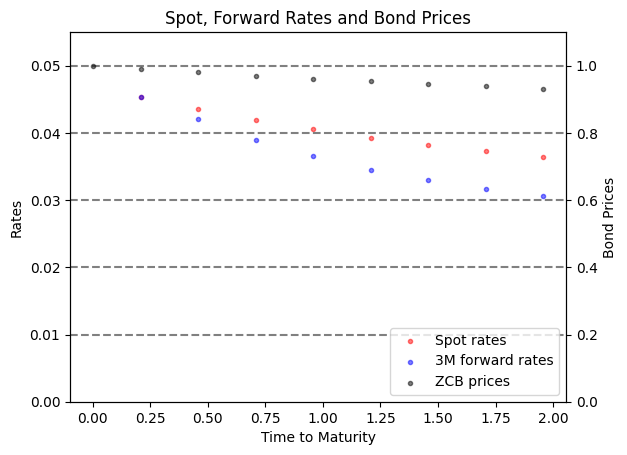

In [6]:
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T[1:], R[1:],marker = '.', label='Spot rates', alpha=0.5, color='red')
scatter2 = ax1.scatter(T[1:], f_3M[1:], marker = '.', label='3M forward rates', alpha=0.5, color='blue')
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# add dotted lines across the plot at 0.01, 0.02, 0.03, 0.04 and 0.05
for i in range(1, 6):
    ax1.axhline(y=i*0.01, color='gray', linestyle='--')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p, label='ZCB prices', marker = '.', color='black', alpha=0.5)
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()

#### (e) What would the prices of the 3 swaps and 5 bonds be if all spot rates were to suddenly drop by 10 basispoints (0.1 percentage points)?

In [7]:
# new spot rates
R_10_bps = R - 0.001*np.ones([])

print("New spot rates: \n", R_10_bps)

# new zero coupon bond prices
p_10_bps = fid.zcb_prices_from_spot_rates(T, R_10_bps)


print("New zero coupon bond prices: \n", p_10_bps)

# new prices of the bonds and swaps
pi_10_bps = C @ p_10_bps
print("New prices for swaps and bonds: \n", pi_10_bps)

New spot rates: 
 [       nan 0.04431828 0.04251833 0.04092989 0.03952809 0.03829101
 0.03719928 0.03623584 0.03538561]
New zero coupon bond prices: 
 [1.         0.99080952 0.98070109 0.97142423 0.96282743 0.95478576
 0.94719627 0.93997416 0.9330497 ]
New prices for swaps and bonds: 
 [  0.86973647  -1.1740026    2.22576323 103.11782696 101.94643885
 104.68023231 101.25333922 103.86602576]


In [8]:
# prices of the swaps and bonds (provided) in the answers - these do not align with answers in his code. The above are correct!
pi_given_10_bps = np.array([
    0.79112002,  # New price of Swap 1
    -1.01905877, # New price of Swap 2
    2.04216409,  # New price of Swap 3
    102.91463487, # New price of Bond 4
    101.6940268,  # New price of Bond 5
    104.36920266, # New price of Bond 6
    101.00315798, # New price of Bond 7
    103.56116735  # New price of Bond 8
])

#### (f) Find the par swap rate for swap i) today on January 15. 2017. That is, find the size of the fixed coupon such that it would have had a value of 0 today. Can you determine if a trader, who has held this receiver swap since issuance, has made money simply by comparing the par swap rate at issuance to the par swap rate today

In [9]:
S_swap = T[2]*p[2]+0.5*p[4] # accrual factor interpretation: dollar value of one basispoint change
R_swap = ((0.25*L_3M+1)*p[1]-p[4])/S_swap # discounted cash flow of the swap
print('R_swap if issued today: \n', R_swap)

R_swap if issued today: 
 0.04469388618153483


#### (g) Compute the accrual factor of swap i) and use the accrual factor along with the new par swap rate to find the PnL of this swap since the day of issuance

In [10]:
PnL_swap = - S_swap*(R_swap-R_1)
print(f'Accrual factor: {S_swap} and PnL of reciever swap: {PnL_swap}')

Accrual factor: 0.930234610936274 and PnL of reciever swap: 0.005866165334439804


#### (h) Does your answer conform with other information given in this problem?

The PnL is positive confirms that the owner of the receiver swap did indeed make money from
his position as the reciever swap is positioned to benefit from a decrease in interest rates.

---

Now a trader calls you and offers to sell a fixed rate bullet bond with semi-annual coupons of 5.2%
maturing on December 30. 2018 for 100.2.


### (i) Trader adding a bullet bond to the market - does this give rise to arbitrage opportunities?

Arbitrage is present if at least 1 ZCB price is negative

In [11]:
# traders offering
R_trader = 0.052
pi_trader = 100.2

# adding the bond to the cash-flow matrix
pi_ijk = np.hstack([pi,np.array([pi_trader])])
C_trader = np.array([0,0,0.5*K*R_trader,0,0.5*K*R_trader,0,0.5*K*R_trader,0,0.5*K*R_trader+K])
C_ijk = np.vstack([C,C_trader])

pi_trader_no_arbitrage = C_trader @ p

print(f'Fair market price of the bond offered by the trader: {pi_trader_no_arbitrage}')
print(f'Price of the bond offered by the trader: {pi_trader}')
print(f'Difference in price: {pi_trader_no_arbitrage-pi_trader}')


Fair market price of the bond offered by the trader: 103.0523385081963
Price of the bond offered by the trader: 100.2
Difference in price: 2.852338508196297


### (j) Construct a replicating portfolio and identify the arbitrage opportunity

In [12]:
# replicating portfolio
h_rep = np.linalg.solve(C[:,1:].T, C_trader[1:]) # remoing the first column as it is today's cash flow
print(f'Replicating portfolio: \n{np.round(h_rep,8)}')

# type II arbitrage portfolio
h_arb_II = np.hstack([-h_rep,np.array([1])]) # short the replicating portfolio and buy the bond (as bond is priced under fair market value)
print(f'Type II arbitrage portfolio: \n{np.round(h_arb_II,8)}')

# cash flow of the arbitrage portfolio
C_arb_II = h_arb_II @ C_ijk
print(f'Cash flow of the arbitrage portfolio: \n{np.round(C_arb_II,8)}') # we see that the cash flow is zero in all periods - hence we can leverage price discrepancy today

# price of the bond in the arbitrage portfolio
pi_arb_II = h_arb_II @ pi_ijk
print(f'Price of the bond in the arbitrage portfolio: {pi_arb_II}') # negative price - hence we earn money today

Replicating portfolio: 
[-0.0319491   0.02555447  0.0319491   0.          0.02536585  0.96147572
  0.          0.        ]
Type II arbitrage portfolio: 
[ 0.0319491  -0.02555447 -0.0319491  -0.         -0.02536585 -0.96147572
 -0.         -0.          1.        ]
Cash flow of the arbitrage portfolio: 
[ 0. -0.  0. -0.  0.  0.  0.  0.  0.]
Price of the bond in the arbitrage portfolio: -2.852338508196297


### (k) Type I arbitrage

In [13]:
# desired cash flow
C_march_2017_zcb = np.zeros(M)
C_march_2017_zcb[1] = 1 # the only period we want a cash flow in

# replicating portfolio of zcb to March 2017
h_march_2017_zcb = np.linalg.solve(C[:,1:].T, C_march_2017_zcb[1:].T) # remoing the first column as it is today's cash flow
h_march_2017_zcb = np.hstack([h_march_2017_zcb,0]) # adding 0 as we do not want the new bond being offered as part of the zcb miroring portfolio
print(f'Portfolio replicating the March 2017 ZCB: \n{np.round(h_march_2017_zcb,8)}')

# cash flow of the portfolio replicating the March 2017 ZCB
C_march_2017_zcb = h_march_2017_zcb @ C_ijk
print(f'Cash flow of the portfolio replicating the March 2017 ZCB: \n{np.round(C_march_2017_zcb,8)}')

# price of the bond in the arbitrage portfolio
pi_march_2017_zcb = h_march_2017_zcb @ pi_ijk
print(f'Price of the portfolio replicating the March 2017 ZCB is: {pi_march_2017_zcb}')

# finding the arbitrage portfolio
h_arb_I = - pi_arb_II/pi_march_2017_zcb*h_march_2017_zcb + h_arb_II # buying march 2017 ZCB by leveraging the type II arbitrage portfolio to get the cost now to zero (it has 0 cash flows in the future)
print(f'Type I arbitrage portfolio: \n{np.round(h_arb_I,8)}')

# cash flow of the arbitrage portfolio
C_arb_I = h_arb_I @ C_ijk
print(f'Cash flow of the arbitrage portfolio: \n{np.round(C_arb_I,8)}') # only positive cash flow on march 2017

# price of the bond in the arbitrage portfolio
pi_arb_I = h_arb_I @ pi_ijk
print(f'Price of the bond in the arbitrage portfolio: {pi_arb_I}') # 0 cost today, hence type 1 arbitrage

Portfolio replicating the March 2017 ZCB: 
[-9.89300e-05  2.46000e-06 -9.77274e-03 -0.00000e+00  0.00000e+00
  9.67375e-03  0.00000e+00  0.00000e+00  0.00000e+00]
Cash flow of the portfolio replicating the March 2017 ZCB: 
[ 0.  1.  0. -0. -0.  0.  0.  0. -0.]
Price of the portfolio replicating the March 2017 ZCB is: 0.9906031214634187
Type I arbitrage portfolio: 
[ 0.03166424 -0.02554738 -0.06008868 -0.         -0.02536585 -0.93362117
  0.          0.          1.        ]
Cash flow of the arbitrage portfolio: 
[ 0.          2.87939584  0.         -0.          0.          0.
  0.          0.          0.        ]
Price of the bond in the arbitrage portfolio: 0.0


---

## Problem 2

In [14]:
# setting up the data
EURIBOR_fixing = [{'id':0,'instrument':'libor','maturity':1/2,'rate':0.02750}]
fra_market = [{'id':1,'instrument':'fra','exercise':1/12,'maturity':7/12,'rate':0.02980},
              {'id':2,'instrument':'fra','exercise':2/12,'maturity':8/12,'rate':0.03122},
              {'id':3,'instrument':'fra','exercise':3/12,'maturity':9/12,'rate':0.03257},
              {'id':4,'instrument':'fra','exercise':4/12,'maturity':10/12,'rate':0.03384},
              {'id':5,'instrument':'fra','exercise':5/12,'maturity':11/12,'rate':0.03504},
              {'id':6,'instrument':'fra','exercise':6/12,'maturity':12/12,'rate':0.03617},
              {'id':7,'instrument':'fra','exercise':7/12,'maturity':13/12,'rate':0.03724},
              {'id':8,'instrument':'fra','exercise':8/12,'maturity':14/12,'rate':0.03825},
              {'id':9,'instrument':'fra','exercise':9/12,'maturity':15/12,'rate':0.03920},
              ]
swap_market = [{'id':10,'instrument':'swap','maturity':2,'rate':0.03782,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':11,'instrument':'swap','maturity':3,'rate':0.04152,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':12,'instrument':'swap','maturity':4,'rate':0.04402,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':13,'instrument':'swap','maturity':5,'rate':0.04577,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':14,'instrument':'swap','maturity':7,'rate':0.04797,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':15,'instrument':'swap','maturity':10,'rate':0.04971,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':16,'instrument':'swap','maturity':15,'rate':0.05105,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':17,'instrument':'swap','maturity':20,'rate':0.05170,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               {'id':18,'instrument':'swap','maturity':30,'rate':0.05230,'float_freq':'semiannual','fixed_freq':'annual','indices':[]},
               ]

data = EURIBOR_fixing + fra_market + swap_market

### (a) Calibrate ZCB spot rates, and instantaneous forward rates

In [15]:
interpolation_options = {'method':'hermite','degree':2} # alternatively {'method':'linear'}, degree is only used for hermite; degree = 1 is linear interpolation

T_fit, R_fit = fid.zcb_curve_fit(data, interpolation_options)
print(f'T_fit:\n{T_fit}') 
print(f'R_fit:\n{R_fit}') # fitted spot rates at the points where we have data
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_fit, R_fit, interpolation_options, resolution=1) # interpolating data between the points, resolution = 1, is monthly data, = 2 is bi-monthly data etc.
# print(f'T_inter:\n{T_inter}')
# print(f'R_inter:\n{R_inter}') # interpolated spot rates between the points

T_fit:
[ 0.08333333  0.16666667  0.25        0.33333333  0.41666667  0.5
  0.58333333  0.66666667  0.75        0.83333333  0.91666667  1.
  1.08333333  1.16666667  1.25        2.          3.          4.
  5.          7.         10.         15.         20.         30.        ]
R_fit:
[0.01906476 0.02232651 0.02396201 0.02532527 0.02637387 0.02731265
 0.02807797 0.02881575 0.02952576 0.03026425 0.03093535 0.03157974
 0.03214854 0.03270422 0.03324377 0.03722828 0.04090946 0.04342305
 0.04520205 0.04747371 0.04930279 0.05074546 0.05146687 0.05217788]


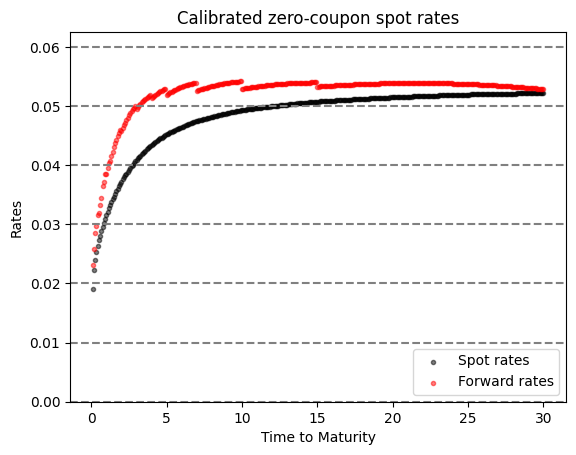

In [16]:
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T_inter[1:], R_inter[1:],marker = '.', label='Spot rates', alpha=0.5, color='black')
scatter2 = ax1.scatter(T_inter[1:], f_inter[1:], marker = '.', label='Forward rates', alpha=0.5, color='red')
ax1.set_ylim([0, 0.0625])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# lines at each tick
for tick in ax1.get_yticks():
    ax1.axhline(y=tick, color='gray', linestyle='--')

# Combine legends
scatters = [scatter1, scatter2]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Calibrated zero-coupon spot rates')
plt.show()

### (b) Compute prices, YTM, macauley duration, modified duration, and convexity of the bonds

In [17]:
K_fr, mat_fr, cp_py_fr, cp_rate_fr = 100, 10, 2, 0.05 # given data: principal, maturity, coupon payments per year, coupon rate
delta_ytm = 0.001
T_fr = np.array([i/cp_py_fr for i in range(0, mat_fr*cp_py_fr+1)]) # time array for the bond
C_fr = np.zeros(mat_fr*cp_py_fr+1) # cash flow array for the bond

for i in range(1, mat_fr*cp_py_fr+1):
    C_fr[i] = (T_fr[i]-T_fr[i-1])*cp_rate_fr*K_fr
C_fr[-1] += K_fr # adding the principal to the last cash flow

p_fr = np.array(fid.for_values_in_list_find_value_return_value(T_fr,T_inter,p_inter)) # calculating the zero coupon bond prices for the bond
price_fr = p_fr @ C_fr # calculating the price of the bond
ytm_fr = fid.ytm(price_fr,T_fr,C_fr) # calculating the yield to maturity of the bond
D = fid.macauley_duration(price_fr,T_fr,C_fr,ytm_fr) # calculating the macauley duration of the bond
MD = fid.modified_duration(price_fr,T_fr,C_fr,ytm_fr) # calculating the modified duration of the bond
K = fid.convexity(price_fr,T_fr,C_fr,ytm_fr) # calculating the convexity of the bond

print(f'Fixed rate bond price: {price_fr}')
print(f'YTM: {ytm_fr}')
print(f'Macaulay Duration: {D}')
print(f'Modified Duration: {MD}')
print(f'Convexity: {K}')

Fixed rate bond price: 100.71722924408364
YTM: 0.049686110836775946
Macaulay Duration: 7.997952267162474
Modified Duration: 7.619375149002176
Convexity: 73.46539950576619


### (c) Estimate the percentage change in the price of the fixed rate bond for a 10bps increase in the yield-to-maturity using duration and duration and convexity

In [18]:
pct_chg_D = -MD*delta_ytm # percentage change in price for a 1 basis point increase in yield
pct_chg_D_and_K = -MD*delta_ytm + 0.5*(K+D)*(delta_ytm/(1+ytm_fr))**2 # percentage change in price for a 1 basis point increase in yield and convexity

print(f'Estimated pct. change using duration: {pct_chg_D}') # 1bps
print(f'Estimated pct. change using duration and convexity: {10*pct_chg_D_and_K}') # 1bps

Estimated pct. change using duration: -0.0076193751490021755
Estimated pct. change using duration and convexity: -0.07582408219629701


### (d) Compute the accrual factor and par swap rate of the 3Y interest rate swap

In [19]:
K_3Y_swap = 100
T_3Y_swap_fixed_leg = np.array([i for i in range(0,4)])
print(f'T_3Y_swap_fixed_leg: {T_3Y_swap_fixed_leg}')
p_3Y_swap_fixed_leg = np.array(fid.for_values_in_list_find_value_return_value(T_3Y_swap_fixed_leg,T_inter,p_inter))
# print(f'p_3Y_swap_fixed_leg: {p_3Y_swap_fixed_leg}')
S_3Y_swap = 0
for i in range(1,len(T_3Y_swap_fixed_leg)):
    S_3Y_swap += (T_3Y_swap_fixed_leg[i]-T_3Y_swap_fixed_leg[i-1])*p_3Y_swap_fixed_leg[i]
R_3Y_swap = (1-p_3Y_swap_fixed_leg[-1])/S_3Y_swap
print(f'3Y payer swap: S_3Y_swap: {S_3Y_swap}, R_3Y_swap: {R_3Y_swap}')

T_3Y_swap_fixed_leg: [0 1 2 3]
3Y payer swap: S_3Y_swap: 2.7816653667401505, R_3Y_swap: 0.04152049329491937


### (e) Compute the accrual factor and par swap rate of the 10Y interest rate swap

In [20]:
K_10Y_swap = 100
T_10Y_swap_fixed_leg = np.array([i for i in range(0,11)])
print(f'T_10Y_swap_fixed_leg: {T_10Y_swap_fixed_leg}')
p_10Y_swap_fixed_leg = np.array(fid.for_values_in_list_find_value_return_value(T_10Y_swap_fixed_leg,T_inter,p_inter))
# print(f'p_3Y_swap_fixed_leg: {p_3Y_swap_fixed_leg}')
S_10Y_swap = 0
for i in range(1,len(T_10Y_swap_fixed_leg)):
    S_10Y_swap += (T_10Y_swap_fixed_leg[i]-T_10Y_swap_fixed_leg[i-1])*p_10Y_swap_fixed_leg[i]
R_10Y_swap = (1-p_10Y_swap_fixed_leg[-1])/S_10Y_swap
print(f'10Y payer swap: S_10Y_swap: {S_10Y_swap}, R_3Y_swap: {R_10Y_swap}')

T_10Y_swap_fixed_leg: [ 0  1  2  3  4  5  6  7  8  9 10]
10Y payer swap: S_10Y_swap: 7.829710221444618, R_3Y_swap: 0.04971138643859005


### (f) Compute the PnL of the fixed rate bond, the 3Y payer swap and the 10Y receiver swap resulting from the increase in ZCB

In [21]:
# shifting the spot rates zcb curve
R_inter_zcb_shift = R_inter + np.array([0] + [0.001 for i in range(1,len(R_inter))])
p_inter_zcb_shift = fid.zcb_prices_from_spot_rates(T_inter, R_inter_zcb_shift)
p_fr_zcb_shift = np.array(fid.for_values_in_list_find_value_return_value(T_fr,T_inter,p_inter_zcb_shift))
price_fr_zcb_shift = p_fr_zcb_shift @ C_fr
print(f'Fixed rate bond price after shifting the spot rates: {price_fr_zcb_shift}, change in price: {price_fr_zcb_shift-price_fr}')

# PnL of the 3Y payer swap
p_3Y_swap_fixed_leg_zcb_shift = np.array(fid.for_values_in_list_find_value_return_value(T_3Y_swap_fixed_leg,T_inter,p_inter_zcb_shift))
S_3Y_swap_zcb_shift = 0
for i in range(1,len(T_3Y_swap_fixed_leg)):
    S_3Y_swap_zcb_shift += (T_3Y_swap_fixed_leg[i]-T_3Y_swap_fixed_leg[i-1])*p_3Y_swap_fixed_leg_zcb_shift[i]

R_3Y_swap_zcb_shift = (1-p_3Y_swap_fixed_leg_zcb_shift[-1])/S_3Y_swap_zcb_shift
PnL_3Y_swap_zcb_shift = S_3Y_swap_zcb_shift*(R_3Y_swap_zcb_shift-R_3Y_swap)*K_3Y_swap # not negative as this is a payer swap

print(f'3Y payer swap after shifting the spot rates: S_3Y_swap: {S_3Y_swap_zcb_shift}, R_3Y_swap: {R_3Y_swap_zcb_shift}, change in rate: {R_3Y_swap_zcb_shift-R_3Y_swap}')
print(f'PnL of 3Y payer swap after shifting the spot rates: {PnL_3Y_swap_zcb_shift}')


# PnL of the 10Y reciever swap
p_10Y_swap_fixed_leg_zcb_shift = np.array(fid.for_values_in_list_find_value_return_value(T_10Y_swap_fixed_leg,T_inter,p_inter_zcb_shift))
S_10Y_swap_zcb_shift = 0
for i in range(1,len(T_10Y_swap_fixed_leg)):
    S_10Y_swap_zcb_shift += (T_10Y_swap_fixed_leg[i]-T_10Y_swap_fixed_leg[i-1])*p_10Y_swap_fixed_leg_zcb_shift[i]

R_10Y_swap_zcb_shift = (1-p_10Y_swap_fixed_leg_zcb_shift[-1])/S_10Y_swap_zcb_shift
PnL_10Y_swap_zcb_shift = - S_10Y_swap_zcb_shift*(R_10Y_swap_zcb_shift-R_10Y_swap)*K_10Y_swap

print(f'10Y payer swap after shifting the spot rates: S_10Y_swap: {S_10Y_swap_zcb_shift}, R_10Y_swap: {R_10Y_swap_zcb_shift}, change in rate: {R_10Y_swap_zcb_shift-R_10Y_swap}')
print(f'PnL of 10Y reciever swap after shifting the spot rates: {PnL_10Y_swap_zcb_shift}')

Fixed rate bond price after shifting the spot rates: 99.91880783452179, change in price: -0.798421409561854
3Y payer swap after shifting the spot rates: S_3Y_swap: 2.776192761662996, R_3Y_swap: 0.042556718393308886, change in rate: 0.0010362250983895135
PnL of 3Y payer swap after shifting the spot rates: 0.2876760617602493
10Y payer swap after shifting the spot rates: S_10Y_swap: 7.790099188501659, R_10Y_swap: 0.05074429044856528, change in rate: 0.0010329040099752301
PnL of 10Y reciever swap after shifting the spot rates: -0.8046424689908149


### (g) To hedge the long position in the fixed rate bond against a 10 bps increase in ZCB spot rates using only the 3Y payer swap, what should the principal of the swap be?

In [22]:
pos_3Y_swap_zcb_shift = -(price_fr_zcb_shift - price_fr)/PnL_3Y_swap_zcb_shift * K_3Y_swap
print(f'To hedge 10Y fixed bond using 3Y payer swap, the pricipal must be: {pos_3Y_swap_zcb_shift}')

To hedge 10Y fixed bond using 3Y payer swap, the pricipal must be: 277.5418311403548


### (h) To hedge the long position in the fixed rate bond against a 10 bps increase in ZCB spot rates using only the 10Y receiver swap, what should the principal of the swap be?

In [23]:
pos_10Y_swap_zcb_shift = -(price_fr_zcb_shift - price_fr)/PnL_10Y_swap_zcb_shift * K_10Y_swap
print(f'To hedge 10Y fixed bond using 10Y reciever swap, the pricipal must be: {pos_10Y_swap_zcb_shift}')

To hedge 10Y fixed bond using 10Y reciever swap, the pricipal must be: -99.22685420311417


### (i) Relate the size of the hedging positions to the duration of the fixed rate bond and the accrual factors of each of the swaps

In [24]:
# accural factors 
print(f'Accrual factor for 3Y payer swap: {S_3Y_swap_zcb_shift}')
print(f'Accrual factor for 10Y reciever swap: {S_10Y_swap_zcb_shift}')
print(f'Modified duration: {MD}')

Accrual factor for 3Y payer swap: 2.776192761662996
Accrual factor for 10Y reciever swap: 7.790099188501659
Modified duration: 7.619375149002176


The fixed rate bond falls in value as rates rise whereas the 3Y payer swap rises in value as rates rise. Therefore, a long position in a payer swap is needed to hedge a long position in a fixed rate bond. The ratio of the sizes of the two positions are roughly equal to the ratio of the modified duration of the fixed rate bond to the swap, why the principal in the 3Y payer swap has to be almost three times that of the fixed rate bond. The 10 receiver swap, like the fixed rate bond, falls in value as rates rise and a negative position in the 10Y receiver swap is needed to hedge the fixed rate bond. The modified duration of the fixed rate bond and the 10Y receiver swap are close, why the principal of the 10Y is much closer to the principal of the 10Y fixed rate bond

### (j) Compute the PnL of the fixed rate bond, the 3Y payer swap and the 10Y receiver swap resulting from the increase in market rates assuming the swaps have a principal of 100

In [25]:
# setting up the new data w. market rates adjusting across the board
data_mr_shift = copy.deepcopy(data)

# adding 10bps to all market rates
for item in data_mr_shift:
    item['rate'] += 0.001

T_fit_mr_shift, R_fit_mr_shift = fid.zcb_curve_fit(data_mr_shift, interpolation_options)
p_inter_mr_shift, R_inter_mr_shift, f_inter_mr_shift, T_inter_mr_shift = fid.zcb_curve_interpolate(T_fit_mr_shift, R_fit_mr_shift, interpolation_options, resolution=1)

# fixed rate bond
p_fr_mr_shift = np.array(fid.for_values_in_list_find_value_return_value(T_fr,T_inter,p_inter_mr_shift))
price_fr_mr_shift = p_fr_mr_shift @ C_fr
print(f'Fixed rate bond price after shifting the spot rates: {price_fr_mr_shift}, change in price: {price_fr_mr_shift-price_fr}')

# PnL of the 3Y payer swap
p_3Y_swap_fixed_leg_mr_shift = np.array(fid.for_values_in_list_find_value_return_value(T_3Y_swap_fixed_leg,T_inter,p_inter_mr_shift))
S_3Y_swap_mr_shift = 0
for i in range(1,len(T_3Y_swap_fixed_leg)):
    S_3Y_swap_mr_shift += (T_3Y_swap_fixed_leg[i]-T_3Y_swap_fixed_leg[i-1])*p_3Y_swap_fixed_leg_mr_shift[i]

R_3Y_swap_mr_shift = (1-p_3Y_swap_fixed_leg_mr_shift[-1])/S_3Y_swap_mr_shift
PnL_3Y_swap_mr_shift = S_3Y_swap_mr_shift*(R_3Y_swap_mr_shift-R_3Y_swap)*K_3Y_swap # not negative as this is a payer swap

print(f'3Y payer swap after shifting the spot rates: S_3Y_swap: {S_3Y_swap_mr_shift}, R_3Y_swap: {R_3Y_swap_mr_shift}, change in rate: {R_3Y_swap_mr_shift-R_3Y_swap}')
print(f'PnL of 3Y payer swap after shifting the spot rates: {PnL_3Y_swap_mr_shift}')

# PnL of the 10Y reciever swap
p_10Y_swap_fixed_leg_mr_shift = np.array(fid.for_values_in_list_find_value_return_value(T_10Y_swap_fixed_leg,T_inter,p_inter_mr_shift))
S_10Y_swap_mr_shift = 0
for i in range(1,len(T_10Y_swap_fixed_leg)):
    S_10Y_swap_mr_shift += (T_10Y_swap_fixed_leg[i]-T_10Y_swap_fixed_leg[i-1])*p_10Y_swap_fixed_leg_mr_shift[i]

R_10Y_swap_mr_shift = (1-p_10Y_swap_fixed_leg_mr_shift[-1])/S_10Y_swap_mr_shift
PnL_10Y_swap_mr_shift = - S_10Y_swap_mr_shift*(R_10Y_swap_mr_shift-R_10Y_swap)*K_10Y_swap

print(f'10Y payer swap after shifting the spot rates: S_10Y_swap: {S_10Y_swap_mr_shift}, R_10Y_swap: {R_10Y_swap_mr_shift}, change in rate: {R_10Y_swap_mr_shift-R_10Y_swap}')
print(f'PnL of 10Y reciever swap after shifting the spot rates: {PnL_10Y_swap_mr_shift}')


Fixed rate bond price after shifting the spot rates: 99.94412007393477, change in price: -0.7731091701488708
3Y payer swap after shifting the spot rates: S_3Y_swap: 2.7763694159174515, R_3Y_swap: 0.042520260123389185, change in rate: 0.0009997668284698127
PnL of 3Y payer swap after shifting the spot rates: 0.27757220456123766
10Y payer swap after shifting the spot rates: S_10Y_swap: 7.7913904594951315, R_10Y_swap: 0.05071136550536925, change in rate: 0.0009999790667791983
PnL of 10Y reciever swap after shifting the spot rates: -0.7791227360598291


Numbers are slightly off on the 8th decimal place

### (k) To hedge the long position in the fixed rate bond against a 10 bps increase in market rates using only the 3Y payer swap, what should the principal of the swap be?

In [26]:
pos_3Y_swap_mr_shift = -(price_fr_mr_shift - price_fr)/PnL_3Y_swap_mr_shift * K_3Y_swap
print(f'To hedge 10Y fixed bond using 3Y payer swap, the pricipal must be: {pos_3Y_swap_mr_shift}')

To hedge 10Y fixed bond using 3Y payer swap, the pricipal must be: 278.5254277786695


### (l) To hedge the long position in the fixed rate bond against a 10 bps increase in market rates using only the 10Y receiver swap, what should the principal of the swap be?

In [27]:
pos_10Y_swap_zcb_shift = -(price_fr_mr_shift - price_fr)/PnL_10Y_swap_mr_shift * K_10Y_swap
print(f'To hedge 10Y fixed bond using 10Y reciever swap, the pricipal must be: {pos_10Y_swap_zcb_shift}')

To hedge 10Y fixed bond using 10Y reciever swap, the pricipal must be: -99.22816192717337


### (m) Relate the size of the hedging positions to the duration of the fixed rate bond and the accrual factors of each of the swaps

From the results, we see that increasing market rates have roughly the same effect on both the fixed rate bond as well as on the swaps and the conclusions regarding the signs and sizes of the swaps positions from question i) also apply in this case

### (n) Discuss pros and cons of hedging the fixed rate bond using the 3Y versus the 10Y swap

The 10Y fixed rate bond is exposed to changes in the entire yield curve up to maturities of 10 year and so is the 10Y swap. The 3Y swap however is not exposed to the yield curve beyond maturities up to 10 year. Hedging using the 3 year swap, is not ideal since changes at the back end of the yield curve would only affect the fixed rate bond rendering the hedge ineffective. When hedging interest rate position, it is important to use instruments of equal duration/accrual factor but it is also good practice to use instruments for hedging that have comparable maturity to the maturity of the instrument being hedged.